In [211]:
from __future__ import print_function, division
#Import BeautifulSoup
from bs4 import BeautifulSoup
#Regular expressions compiler
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import pickle

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
# %pylab inline

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

In [213]:
with open('hosp.pickle','rb') as read_file:
    hosp = pickle.load(read_file)
    
hosp.info()
hosp.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2271 entries, 0 to 2811
Data columns (total 45 columns):
provider_id                                                                          2271 non-null object
start_date                                                                           2271 non-null object
end_date                                                                             2271 non-null object
weighted_avg_EXCESS                                                                  2271 non-null float64
weighted_avg_PRR                                                                     2271 non-null float64
weighted_avg_ERR                                                                     2271 non-null float64
number_of_discharges                                                                 2271 non-null float64
number_of_readmissions                                                               2271 non-null float64
raw_avg_readmitrate                     

,provider_id,start_date,end_date,weighted_avg_EXCESS,weighted_avg_PRR,weighted_avg_ERR,number_of_discharges,number_of_readmissions,raw_avg_readmitrate,measure_name,...,safety_of_care_national_comparison_Below the national average,safety_of_care_national_comparison_Same as the national average,patient_experience_national_comparison_Below the national average,patient_experience_national_comparison_Same as the national average,effectiveness_of_care_national_comparison_Below the national average,effectiveness_of_care_national_comparison_Same as the national average,timeliness_of_care_national_comparison_Below the national average,timeliness_of_care_national_comparison_Same as the national average,efficient_use_of_medical_imaging_national_comparison_Below the national average,efficient_use_of_medical_imaging_national_comparison_Same as the national average
0,010001,07/01/2014,06/30/2017,1.026958,16.718653,16.358910,3657.0,619.0,0.169264,6,...,0,0,1,0,0,1,0,0,0,1
1,010055,07/01/2014,06/30/2017,0.974441,13.876402,14.589286,2468.0,328.0,0.132901,6,...,0,0,0,1,0,1,0,0,0,0
2,010005,07/01/2014,06/30/2017,0.975498,15.366109,15.946703,2021.0,305.0,0.150915,4,...,1,0,0,1,0,0,0,0,1,0
3,010006,07/01/2014,06/30/2017,1.033804,15.761022,15.756545,3335.0,533.0,0.159820,6,...,0,0,1,0,0,1,0,0,1,0
5,010036,07/01/2014,06/30/2017,1.038119,18.697481,18.107952,695.0,135.0,0.194245,3,...,0,0,1,0,0,1,0,0,0,1


In [214]:
#Check correlation of continuous variables

hosp1 = hosp.loc[:,['weighted_avg_PRR','number_of_discharges','Case_Mix_Indexes','FY_2017_Wage_Index',
                 '3_Year_Avg_Hourly_Wage_15_16_17','median_household_income']]
# #remove the alternative outcome calcs
# hosp = hosp.drop(columns=['number_of_readmissions','raw_avg_readmitrate',
#                           'measure_name','weighted_avg_ERR','weighted_avg_EXCESS'])

#'3_Year_Avg_Hourly_Wage_15_16_17','median_household_income',
hosp1.corr()

,weighted_avg_PRR,number_of_discharges,Case_Mix_Indexes,FY_2017_Wage_Index,3_Year_Avg_Hourly_Wage_15_16_17,median_household_income
weighted_avg_PRR,1.000000,-0.259942,-0.275936,-0.018760,-0.081921,-0.143346
number_of_discharges,-0.259942,1.000000,0.397138,0.047690,0.131762,0.090586
Case_Mix_Indexes,-0.275936,0.397138,1.000000,0.163836,0.293141,0.107861
FY_2017_Wage_Index,-0.018760,0.047690,0.163836,1.000000,0.888057,0.563949
3_Year_Avg_Hourly_Wage_15_16_17,-0.081921,0.131762,0.293141,0.888057,1.000000,0.545550
median_household_income,-0.143346,0.090586,0.107861,0.563949,0.545550,1.000000


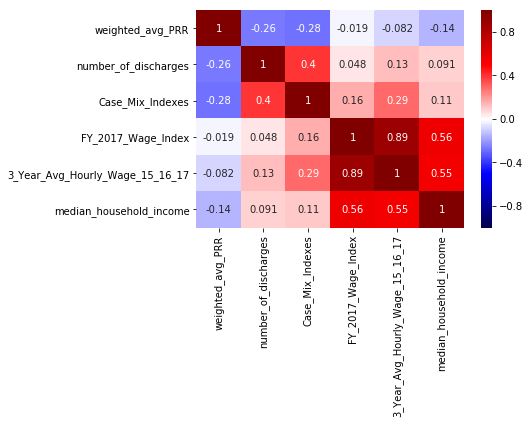

In [215]:
sns.heatmap(hosp1.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

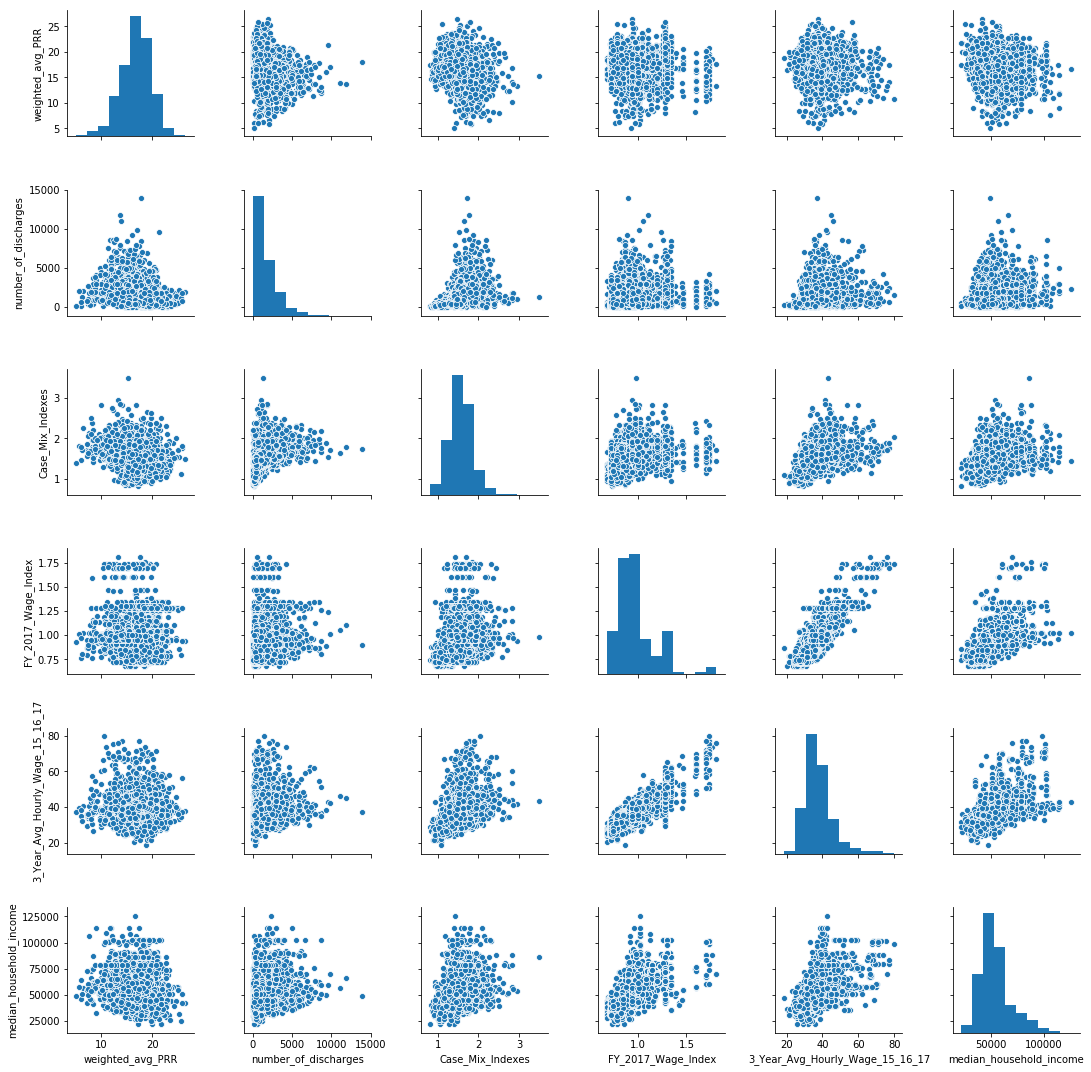

In [187]:
sns.pairplot(hosp1);

### Simple linear regression of continuous variables

In [216]:
# Define the model
# lm1 = smf.ols('weighted_avg_PRR ~ FY_2017_Wage_Index + Case_Mix_Indexes + median_household_income', data=hosp)
lm1 = smf.ols('weighted_avg_PRR ~ Case_Mix_Indexes + number_of_discharges + FY_2017_Wage_Index + median_household_income', data=hosp)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       weighted_avg_PRR   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     80.30
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           8.38e-64
Time:                        12:31:12   Log-Likelihood:                -5569.6
No. Observations:                2271   AIC:                         1.115e+04
Df Residuals:                    2266   BIC:                         1.118e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  21.4845      0.470     45.694      0.000      20.562      22.406
Case_Mix_Indexes           -2.5579      0.263     -9.733      0.000      -3.073      -2.043
number_of_discharges       -0.0003   4.31e-05     -7.730      0.000      -0.000      -0.000
FY_2017_Wage_Index          1.9001      0.374      5.080      0.000       1.167       2.634
median_household_income -3.551e-05   4.86e-06     -7.302      0.000    -4.5e-05    -2.6e-05
==============================================================================
Omnibus:                       58.285   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.520
Skew:                          -0.350   Prob(JB):                     3.59e-15
Kurtosis:                       3.462   Cond. No.                     5.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Split data into train/validate/test sets

In [217]:
X, y = hosp.drop(['weighted_avg_PRR','weighted_avg_ERR','weighted_avg_EXCESS',
                  'raw_avg_readmitrate','number_of_readmissions','measure_name',
                  'provider_id','start_date','end_date','hospital_name','state',
                  'zip_code','county_name','hospital_type','county_st','3_Year_Avg_Hourly_Wage_15_16_17'],axis=1), hosp['weighted_avg_PRR']
#                   '3_Year_Avg_Hourly_Wage_15_16_17',
#                   'mortality_national_comparison_Below the national average',
#                   'mortality_national_comparison_Not Available',
#                   'mortality_national_comparison_Same as the national average',
#                   'hospital_overall_rating_2','hospital_overall_rating_3','hospital_overall_rating_4',
#                   'hospital_overall_rating_5','hospital_overall_rating_Not Available'
#                  emergency_services_True                                           2716 non-null uint8
# hospital_ownership_Government - Hospital District or Authority    2716 non-null uint8
# hospital_ownership_Government - Local                             2716 non-null uint8
# hospital_ownership_Government - State                             2716 non-null uint8
# hospital_ownership_Physician                                      2716 non-null uint8
# hospital_ownership_Proprietary                                    2716 non-null uint8
# hospital_ownership_Tribal                                         2716 non-null uint8
# hospital_ownership_Voluntary non-profit - Church                  2716 non-null uint8
# hospital_ownership_Voluntary non-profit - Other                   2716 non-null uint8
# hospital_ownership_Voluntary non-profit - Private  
                 
#                  ],axis=1), hosp['weighted_avg_PRR']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=5)

In [218]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=7)

In [219]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [220]:
#validate
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.327
Ridge Regression val R^2: 0.327
Degree 2 polynomial regression val R^2: -0.061


In [221]:
lm.fit(X, y)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')


Linear Regression val R^2: 0.363


### Ridge Regularization test

In [222]:
ridge_model = Ridge(alpha = 10)
ridge_model.fit(X_train, y_train)

list(zip(X_train.columns, ridge_model.coef_))

[('number_of_discharges', -0.0005205673112582069),
 ('Case_Mix_Indexes', -2.393750692541356),
 ('FY_2017_Wage_Index', 0.1097843072036747),
 ('median_household_income', -2.37583315516758e-05),
 ('emergency_services_True', -0.01334849183144041),
 ('hospital_ownership_Government - Hospital District or Authority',
  -0.14806762378287933),
 ('hospital_ownership_Government - Local', -0.2522535185652447),
 ('hospital_ownership_Government - State', 0.36908540450531924),
 ('hospital_ownership_Physician', 0.5299393625912975),
 ('hospital_ownership_Proprietary', 0.1473486090542129),
 ('hospital_ownership_Voluntary non-profit - Church', 0.04055344236918505),
 ('hospital_ownership_Voluntary non-profit - Other', -0.049536447511193966),
 ('hospital_ownership_Voluntary non-profit - Private', -0.0871429520527575),
 ('hospital_overall_rating_2', -0.4803188820708498),
 ('hospital_overall_rating_3', -1.5448645403342836),
 ('hospital_overall_rating_4', -2.0537867976084234),
 ('hospital_overall_rating_5', -

### Lasso Regularization test

In [223]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

list(zip(X_train.columns, lasso_model.coef_))

[('number_of_discharges', -0.0005238890060345795),
 ('Case_Mix_Indexes', -0.0),
 ('FY_2017_Wage_Index', 0.0),
 ('median_household_income', -2.1892463829420543e-05),
 ('emergency_services_True', -0.0),
 ('hospital_ownership_Government - Hospital District or Authority', 0.0),
 ('hospital_ownership_Government - Local', -0.0),
 ('hospital_ownership_Government - State', 0.0),
 ('hospital_ownership_Physician', 0.0),
 ('hospital_ownership_Proprietary', 0.0),
 ('hospital_ownership_Voluntary non-profit - Church', -0.0),
 ('hospital_ownership_Voluntary non-profit - Other', -0.0),
 ('hospital_ownership_Voluntary non-profit - Private', -0.0),
 ('hospital_overall_rating_2', 0.0),
 ('hospital_overall_rating_3', -0.0),
 ('hospital_overall_rating_4', -0.0),
 ('hospital_overall_rating_5', -0.0),
 ('mortality_national_comparison_Below the national average', -0.0),
 ('mortality_national_comparison_Same as the national average', -0.0),
 ('safety_of_care_national_comparison_Below the national average', 0.0

### Graphing the linear model

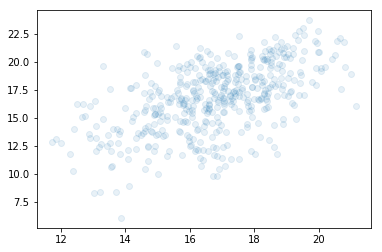

In [224]:
test_set_pred = lm.predict(X_test)

plt.scatter(test_set_pred, y_test, alpha=.1);
# plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))

In [225]:
r2_score(y_test, test_set_pred)

0.31103914565668944

In [226]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

1.97827604100134

In [197]:
plt.figure(figsize=(12,8))
plt.scatter(lm.predict(X_test), lm.resid);

AttributeError: 'LinearRegression' object has no attribute 'resid'

<Figure size 864x576 with 0 Axes>

In [ ]:
#add dummy variables
#split - split and validate function
#plot residuals
#plot with polynomial regression
#regularize
#test it on the test data